In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

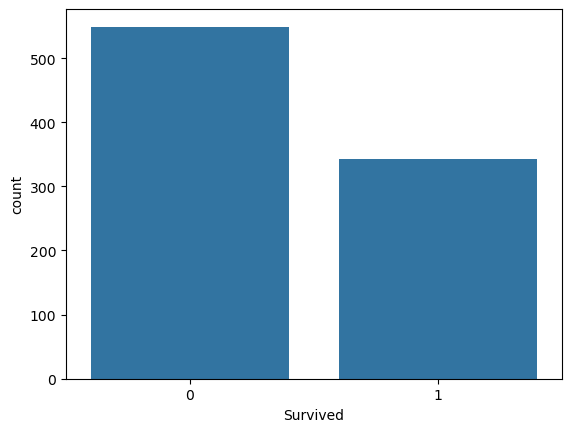

In [ ]:
sns.countplot(x='Survived', data=train)
plt.show()

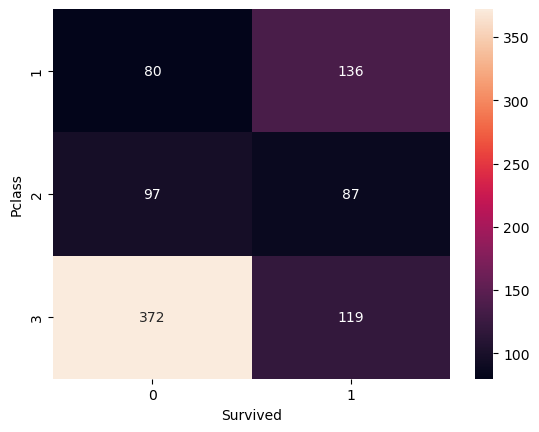

In [13]:
sns.heatmap(train.groupby(["Pclass", "Survived"]).size().unstack(), annot=True, fmt="d")
plt.show()

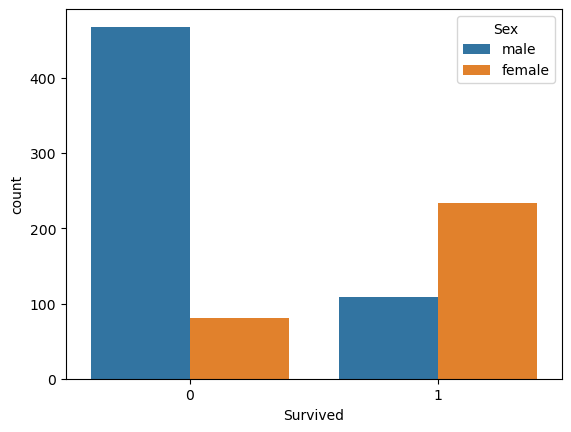

In [15]:
sns.countplot(x = 'Survived', hue='Sex', data=train)
plt.show()

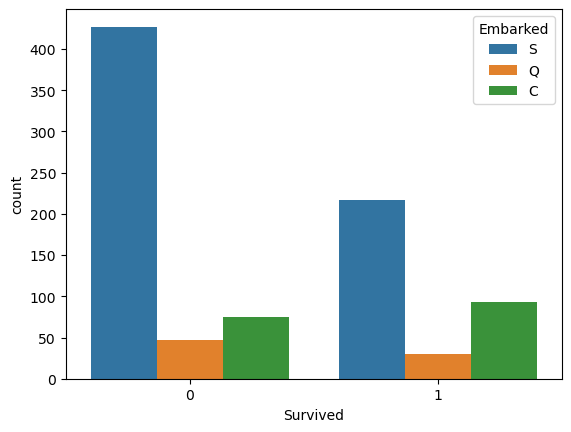

In [16]:
# Survival by Embarked
sns.countplot(x='Survived', hue='Embarked', data=train)
plt.show()

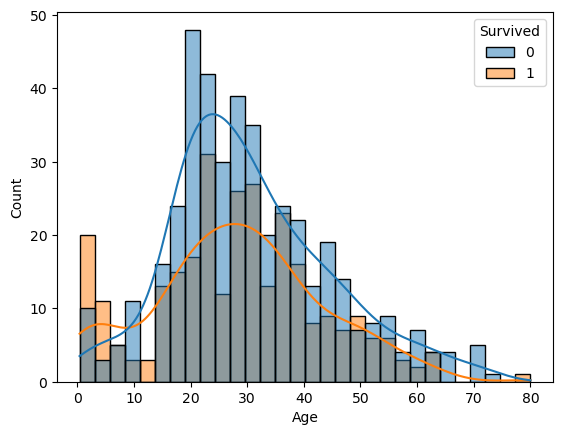

In [17]:
sns.histplot(data=train, x='Age', hue='Survived', bins=30, kde=True)
plt.show()

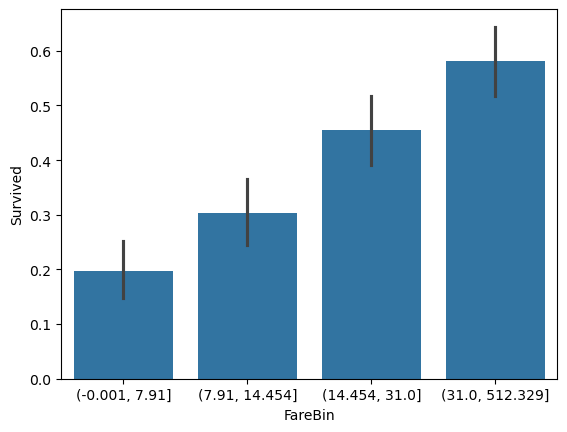

In [19]:
train['FareBin'] = pd.qcut(train['Fare'], 4)
sns.barplot(x='FareBin', y='Survived', data=train)
plt.show()

In [22]:
women = train[train['Sex'] == 'female']['Survived']
rate_women = sum(women) / len(women)

print("% of women survived: ", rate_women)

% of women survived:  0.7420382165605095


In [24]:
men = train[train['Sex'] == 'male']['Survived']
men_rate = sum(men)/ len(men)

print("% of men survived ",men_rate)

% of men survived  0.18890814558058924


In [25]:
test = pd.read_csv('test.csv')

In [26]:
from sklearn.ensemble import RandomForestClassifier

y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
